# Ford GoBike System Data Exploration
## by Imesha Kuruppu

## Preliminary Wrangling

> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. The Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay, and San Jose. This dataset has data on the bike-sharing system collected in February 2019. This document explores the bike-sharing data set containing bike trip attributes and user attributes. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# find the size of the dataset
bike_data.shape

(183412, 16)

In [4]:
# view first five rows of the dataset
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# view the information of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> According to the information about the dataset, some columns have wrong data types(ex:start_time,member_gender) and some columns(ex:start_station_id, member_gender) have null values.

In [7]:
# find sum of null values in each column
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# check whether there are any duplicated rows
sum(bike_data.duplicated())

0

In [9]:
# descriptive statistics for numeric variables
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
bike_data['start_time'].min(), bike_data['start_time'].max()

('2019-02-01 00:00:20.6360', '2019-02-28 23:59:18.5480')

> This dataset has 183412 rows and 16 columns. This dataset includes bike-sharing data of February month in 2019. start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender columns have null values. There are no duplicated rows. Some columns have the wrong data types. When checking the min and max values of columns, it seems the member birth year has some outliers.

In [11]:
# getting a copy of the dataframe before performing any data wrangling
bike_data_copy = bike_data.copy()

In [12]:
# deleting columns that are not necessary for the data exploration
bike_data_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_share_for_all_trip'], axis=1, inplace=True)

In [13]:
# drop rows with any null values in the data set
bike_data_copy.dropna(inplace=True)

In [14]:
# checking whether there are any null values in the dataset
bike_data_copy.isnull().sum().any()

False

In [15]:
# convert the data type of start time and end time to datetime
bike_data_copy['start_time'] = pd.to_datetime(bike_data_copy['start_time'])
bike_data_copy['end_time'] = pd.to_datetime(bike_data_copy['end_time'])

In [16]:
# convert the data type of member_birth_year to integer 
bike_data_copy['member_birth_year'] = bike_data_copy['member_birth_year'].astype(int)

In [17]:
# convert the data type of user_type and member_gender to category
bike_data_copy['user_type']= bike_data_copy['user_type'].astype('category')
bike_data_copy['member_gender'] = bike_data_copy['member_gender'].astype('category')

In [18]:
# moving the start date value to a new column (start_date)
bike_data_copy['start_date'] = bike_data_copy['start_time'].dt.date
bike_data_copy['start_date'] = pd.to_datetime(bike_data_copy['start_date'])

In [19]:
# moving the day of the week to a new column (start_day)
bike_data_copy['start_day'] =bike_data_copy['start_date'].dt.weekday

In [20]:
# moving the start hour to a new column (start_hour)
bike_data_copy['start_hour'] = bike_data_copy['start_time'].dt.hour

In [21]:
# convert the trip durations from seconds to minutes and save in a new column
bike_data_copy['duration_min'] = bike_data_copy['duration_sec'] / 60

In [22]:
# calculating the age of users and save it to a new column(user_age)
bike_data_copy['user_age'] = 2019 - bike_data_copy['member_birth_year']

In [23]:
# checking the data set information
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  float64       
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  float64       
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  int64         
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  int32         
 10  member_gender       174952 non-null  category      
 11  start_date          174952 non-null  datetime64[ns]
 12  start_day           174952 non-null  int64         
 13  start_hour          174952 no

In [24]:
# save the cleaned data set in to a new file
bike_data_copy.to_csv('201902_fordgobike_tripdata_cleaned.csv', index=False)

In [25]:
bike_data_copy = pd.read_csv('201902_fordgobike_tripdata_cleaned.csv')

### What is the structure of your dataset?

> Initially, this data-set included 183412 rows and 16 columns. After the preliminary data-wrangling, this data set included data for 174952 bike trips along with 16 columns.
For each bike trip, it included information about the trip duration,  start/end time, start/end station id and name, bike id, user type, member birth year, and member gender. 
'start_date', 'start_day', 'start_hour', 'duration_min', and 'user_age' columns derived from existing columns.


### What is/are the main feature(s) of interest in your dataset?

> If we need to increase the use of bike share system, we need to recognize 
    1. Times(when and where) that bikes are high in demand. 
    2. Type of users that use the bike system most and their characteristics like age, gender. 
    3. Factors impacting the trip duration and in which situations the users have used longer trips.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Following variables will be useful when investigating above mentioned features of interest respectively, 
    1. start time, start station id and name  
    2. user type, member_birth_year(user_age), member_gender  
    3. duration_sec, user type, member_birth_year(user_age), member_gender  


## Univariate Exploration

> In this section, I investigated distributions of individual variables. 

In [26]:
bike_data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,start_day,start_hour,duration_min,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,2019-02-28 00:00:00.000,3,17,869.750000,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,2019-02-28 00:00:00.000,3,12,1030.900000,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,2019-02-28 00:00:00.000,3,17,608.166667,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,2019-02-28 00:00:00.000,3,23,26.416667,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,2019-02-28 00:00:00.000,3,23,29.883333,60


In [27]:
bike_data_copy.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_day,start_hour,duration_min,user_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,2.619953,13.456165,11.733379,34.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,1.808470,4.734282,27.370082,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,0.000000,0.000000,1.016667,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,1.000000,9.000000,5.383333,27.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,3.000000,14.000000,8.500000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,4.000000,17.000000,13.150000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,6.000000,23.000000,1409.133333,141.000000


> According to the above data maximum age of the user is 141 years. It implies, there are outliers in the user_age data set.

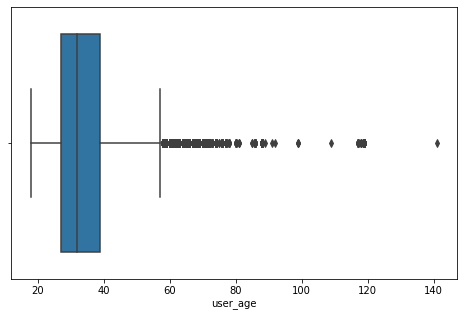

In [28]:
# lets plot a boxplot for user_age column to check whether there are outliers. 
plt.figure(figsize=[8, 5])
sb.boxplot(bike_data_copy['user_age']);
plt.show()

> There are outliers in the user_age column. According to the graph, it seems most of the users are under 60 years old. Thus, I decided to keep only users with 60 years old or less.

In [29]:
# filtering only users with age less than or equal to 60 and remove other users from the data set.
bike_data_copy = bike_data_copy.query('user_age <= 60')

In [30]:
# check minimum and maximum ages of users in the new data set
bike_data_copy['user_age'].min(), bike_data_copy['user_age'].max()

(18, 60)

In [31]:
# setting up a base color for all graphs 
base_color = sb.color_palette()[0]

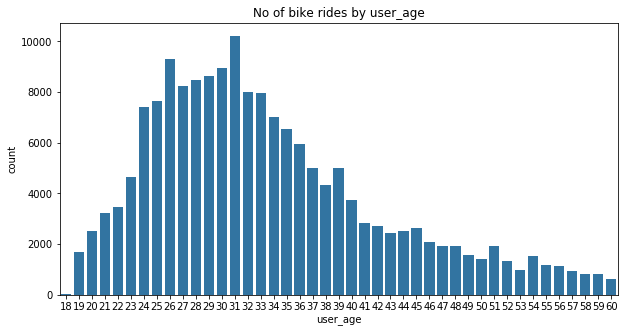

In [32]:
# investigation of the distribution of 'user_age'
plt.figure(figsize=[10, 5])
sb.countplot(data=bike_data_copy, x='user_age', color=base_color);
plt.title('No of bike rides by user_age');

> The graph shows the number of bike rides used at each age. 31-year-old people use the most bike rides. Most of the bike rides are used by people in the age 24-35 years. After 35 years and before 24 years use of bikes decreases.

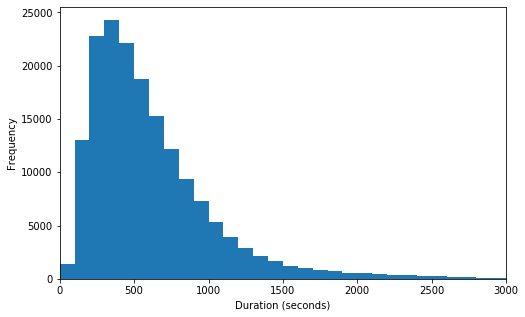

In [33]:
# investigation of the distribution of 'duration_sec'
binsize = 100
bins = np.arange(0, bike_data_copy['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.xlim(0,3000)
plt.hist(data = bike_data_copy, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

> Trip duration has a long-tailed distribution. Duration data is right-skewed. According to the graph most frequent trip duration is around 500s. Since the trip duration data is right-skewed, planning to apply a logarithmic transformation to the x-axis.

In [34]:
# finding the trip duration mean in minutes
bike_data_copy['duration_min'].mean()

11.720436797299643

> The average trip duration time is 11 minutes.

In [35]:
np.log10(bike_data_copy['duration_min'].describe())

count    5.234067
mean     1.068944
std      1.440554
min      0.007179
25%      0.731051
50%      0.929419
75%      1.117823
max      3.148952
Name: duration_min, dtype: float64

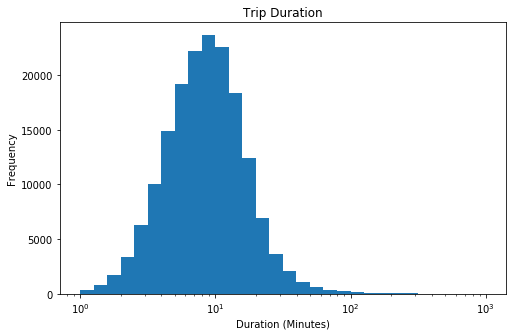

In [36]:
# Applying a logarithmic transformation to trip duration
plt.figure(figsize=[8, 5])
bins = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [0.1, 0.3, 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = bike_data_copy , x = 'duration_min' , bins = bins);
plt.xticks(ticks,labels);
plt.title('Trip Duration')
plt.xlabel('Duration (Minutes)');
plt.ylabel('Frequency')
plt.xscale('log');

> The log transform graph is easy to interpret. According to the graph, the most common trip duration time is 10 mins.

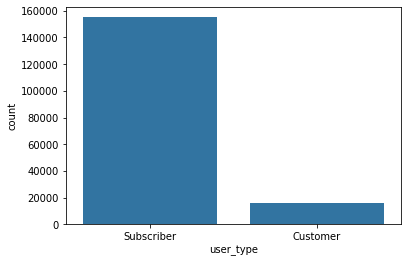

In [37]:
# investigation of the No of bike rides by user type
freq = bike_data_copy['user_type'].value_counts()
user_order = freq.index
sb.countplot(data=bike_data_copy, x='user_type', color=base_color, order=user_order);

> Subscribers have used the bike share system more than customers. 

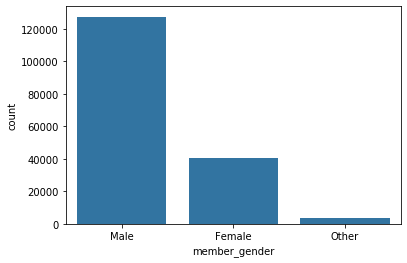

In [38]:
# investigation of the No of bike rides by member gender
freq = bike_data_copy['member_gender'].value_counts()
user_order = freq.index
sb.countplot(data=bike_data_copy, x='member_gender', color=base_color, order=user_order);

> Males have used the bike share system more than other genders.

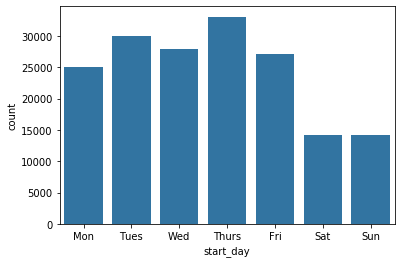

In [39]:
# investigation of the bike usage during days of the week (start_day)
sb.countplot(data=bike_data_copy, x='start_day', color=base_color);
ticks =  [0,1,2,3,4,5,6]
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks,labels);

> Most bike trips have happened during weekdays. During weekends usage of the bike-share system is considerably low.

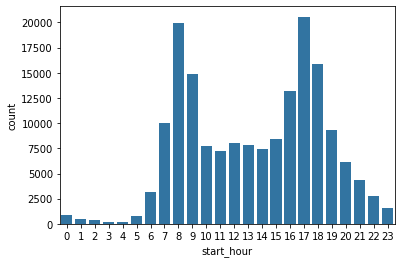

In [40]:
# investigation of the bike usage during each hour of the day (start_hour)
sb.countplot(data=bike_data_copy, x='start_hour', color=base_color);

> The majority of the bike rides have started around 8 am and 5 pm. Middle of the day, the usage of the bike-share system is low.

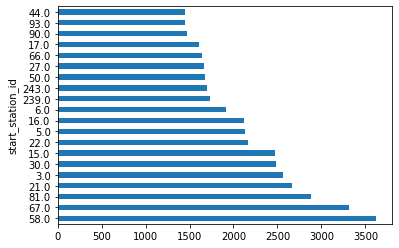

In [41]:
# investigation of the bike usage at each station (start_station_id)
bike_data_copy['start_station_id'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh');
plt.ylabel('start_station_id');

> The top 5 popular start station ids are 58, 67, 81, 21, and 3. The most popular station id is 58.

In [42]:
# Finding 5 most popular start station names
popular_list = [58, 67, 81, 21, 3]
for i in popular_list:
    station_name = bike_data_copy.query('start_station_id =='+str(i))['start_station_name'].max()
    print(station_name)

Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Powell St BART Station (Market St at 4th St)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration (duration_sec) plot is right-skewed. Thus, applied the log transformation to the x-axis. Then graph becomes more readable and understandable.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1)The user_age column was derived from the member_birth_year column. According to the user_age box plot,  outliers were identified. Most of the bike users are under the age of 60. So, all the other users (age>60) were removed from the dataset.    
 2)Removed all the rows containing null values.  
 3)Data types of some columns were corrected.    
After all these changes dataset becomes clean and tidy. The cleaned dataset can be used to find relationships between variables.

## Bivariate Exploration

> Investigating relationships between pairs of variables in the dataset.

In [43]:
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171422 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        171422 non-null  int64  
 1   start_time          171422 non-null  object 
 2   end_time            171422 non-null  object 
 3   start_station_id    171422 non-null  float64
 4   start_station_name  171422 non-null  object 
 5   end_station_id      171422 non-null  float64
 6   end_station_name    171422 non-null  object 
 7   bike_id             171422 non-null  int64  
 8   user_type           171422 non-null  object 
 9   member_birth_year   171422 non-null  int64  
 10  member_gender       171422 non-null  object 
 11  start_date          171422 non-null  object 
 12  start_day           171422 non-null  int64  
 13  start_hour          171422 non-null  int64  
 14  duration_min        171422 non-null  float64
 15  user_age            171422 non-nul

In [44]:
bike_data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,start_day,start_hour,duration_min,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,2019-02-28 00:00:00.000,3,17,869.750000,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,2019-02-28 00:00:00.000,3,12,1030.900000,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,2019-02-28 00:00:00.000,3,17,608.166667,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,2019-02-28 00:00:00.000,3,23,26.416667,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,2019-02-28 00:00:00.000,3,23,29.883333,60


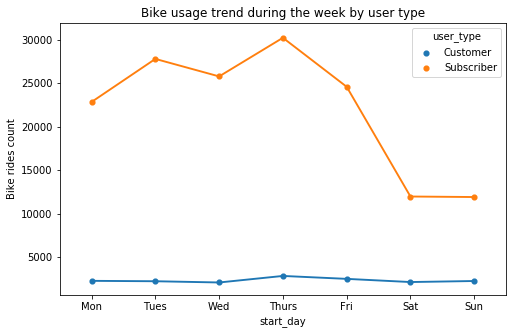

In [45]:
#Investigating the bike usage trend during the week by the user type
df_bike_data_user_week = bike_data_copy.groupby(['start_day', 'user_type']).size().reset_index()
plt.figure(figsize=[8, 5])
sb.pointplot(data=df_bike_data_user_week, x='start_day', y=0 , hue = 'user_type', scale=.7);
ticks =  [0,1,2,3,4,5,6]
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks,labels)
plt.title('Bike usage trend during the week by user type')
plt.ylabel('Bike rides count')
plt.show()

> Subscribers have been using the bike share system mostly on weekdays. During weekends subscribers' bike usage becomes low. When compared to subscribers, customer bike usage is low. It seems there is no significant difference between bike usage on weekdays and weekends in customers. To make this sure, I decided to plot a bar chart and check.

<Figure size 2880x720 with 0 Axes>

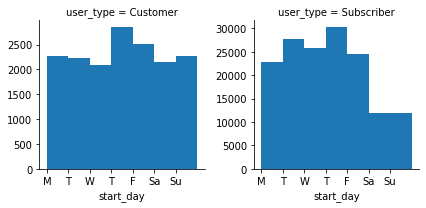

In [46]:
# bar chart for bike usage during the week by the user type 
plt.figure(figsize=[40, 10])
bin_edges = np.arange(0, 6+2, 1)
g = sb.FacetGrid(data = bike_data_copy, col = 'user_type', col_wrap=3, sharey=False);
g.map(plt.hist, "start_day", bins = bin_edges)
ticks =  [0,1,2,3,4,5,6]
labels = ['M', 'T', 'W', 'T', 'F', 'Sa', 'Su']
plt.xticks(ticks,labels);

> According to the barchat for customers it is obvious that there is no significant difference between bike usage in weekdays and weekends.

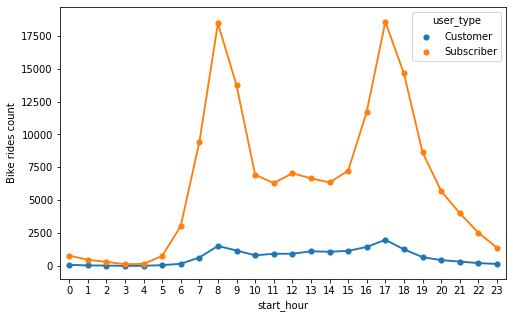

In [47]:
#Investigating the bike usage trend during the day by the user type
df_bike_data_user_hour = bike_data_copy.groupby(['start_hour', 'user_type']).size().reset_index()
plt.figure(figsize=[8, 5])
sb.pointplot(data=df_bike_data_user_hour, x='start_hour', y=0 , hue = 'user_type', scale=.7);
plt.ylabel('Bike rides count')
plt.show()

> The above graph shows the bike usage pattern of each user type hourly during a day. Subscribers' bike usage increases from 5 am to 8 am and then decreases. During the daytime, bike usage decreases. Around 3 pm again bike usage increases and after 5 pm it decreases. For subscribers, bike usage peaks at 8 am and 5 pm.  
When compared with subscribers, customers' bike usage is low. During day time (from 8 am to 5 pm) customers' bike usage is high.

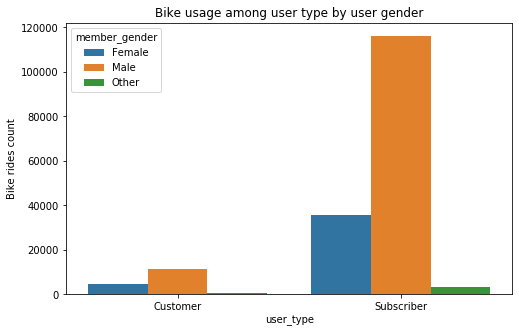

In [48]:
# Bike usage among user type by user gender
df_bikedata_user_gender = bike_data_copy.groupby(['member_gender', 'user_type']).size().reset_index()
df_bikedata_user_gender
plt.figure(figsize=[8, 5])
sb.barplot(data=df_bikedata_user_gender, x='user_type', y=0 , hue = 'member_gender');
plt.title('Bike usage among user type by user gender')
plt.ylabel('Bike rides count')
plt.show()

> In both user types, males use the bike-sharing system most, and then female users use it. The number of users from the 'Other' gender user type is low.

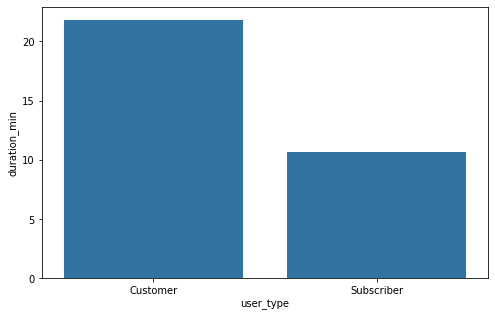

In [49]:
# Investigating the average trip duration of each user type.
df_bike_data_user_duration = bike_data_copy.groupby('user_type')['duration_min'].mean().reset_index()
plt.figure(figsize=[8, 5])
sb.barplot(data=df_bike_data_user_duration, x='user_type', y='duration_min', color = base_color);

In [50]:
df_bike_data_user_duration

,user_type,duration_min
0,Customer,21.829878
1,Subscriber,10.652963


> The average trip duration of customers is higher than subscribers' average trip duration. Customers' average trip duration is almost double when compared with the Subscribers' average trip duration. It implies that customers take longer trips than subscribers.

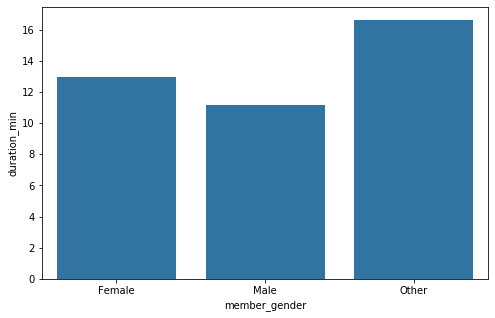

In [51]:
# Investigating the average trip duration of each user gender.
df_bike_data_user_gender = bike_data_copy.groupby('member_gender')['duration_min'].mean().reset_index()
plt.figure(figsize=[8, 5])
sb.barplot(data=df_bike_data_user_gender, x='member_gender', y='duration_min', color = base_color);

In [52]:
df_bike_data_user_gender

,member_gender,duration_min
0,Female,12.973954
1,Male,11.185903
2,Other,16.624729


> The 'Other' gender users have the highest average trip duration. Which means they take the longest bike trips. Female average trip duration is slightly higher than male average trip duration.

<Figure size 1440x360 with 0 Axes>

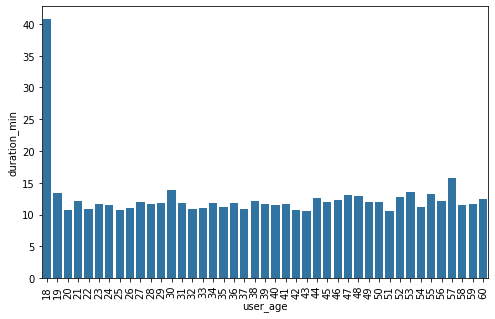

In [53]:
# Investigating the average trip duration of each user age.
plt.figure(figsize=[20, 5])
df_bike_data_user_age = bike_data_copy.groupby('user_age')['duration_min'].mean().reset_index()
plt.figure(figsize=[8, 5])
sb.barplot(data=df_bike_data_user_age, x='user_age', y='duration_min', color = base_color)
plt.xticks(rotation = 90);

> 18-year-old users have the highest average trip duration. That is around 40 mins. For all other users from age 19 to 60, the average trip duration is between 10 - 15 mins.  

In [54]:
# Dividing user age in to 5 bins for easy plotting
bike_data_copy['age_group'] = pd.cut(bike_data_copy['user_age'], bins=[15,25,35,45,55,65])

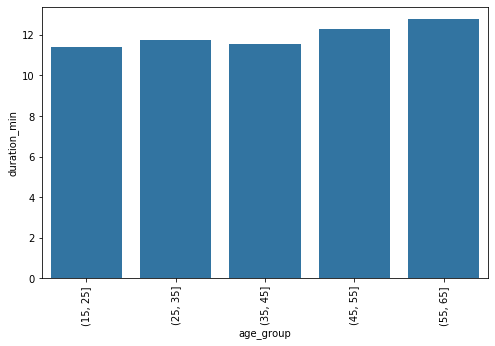

In [55]:
# Investigating the average trip duration of each user age group.
df_bike_data_user_age_group = bike_data_copy.groupby('age_group')['duration_min'].mean().reset_index()
plt.figure(figsize=[8, 5])
sb.barplot(data=df_bike_data_user_age_group, x='age_group', y='duration_min', color = base_color)
plt.xticks(rotation = 90);

In [56]:
df_bike_data_user_age_group

,age_group,duration_min
0,"(15, 25]",11.416419
1,"(25, 35]",11.745523
2,"(35, 45]",11.562300
3,"(45, 55]",12.260677
4,"(55, 65]",12.755134


> Users from the age group (55-65) have the highest average trip duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1) Factors impacting the popularity of the bike sharing system:
        Subscribers usage is high in weekdays and low in weekends, on the other hand customers usage is eqaul during whole week.  
        Subscribers usage is high at 8am and 5pm. During the daytime usage is low, on the other hand customers have equal usage from 8am to 5pm.
        In both user types (Subscribers and Customers), number of male users > number of female users > number of other users  
        Users from 25-35 age uses the bike sharing system most.  
  2)Factors impacting the bike trip duration:
       Customers average trip duration > Subscribers average trip duration  
       Other gender users average trip duration > Female users average trip duration > Male users average trip duration  
       18 year old users average trip duraion is the highest    
       Average trip duration is highest among 55-65 age users


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Behaviour of subscribers and customers differ each other. Users who use the bike share system most use it for shorter trips and on the other hand users who had longer trips didnt use the system much frequently.

## Multivariate Exploration

> Investigating three or more variables together.

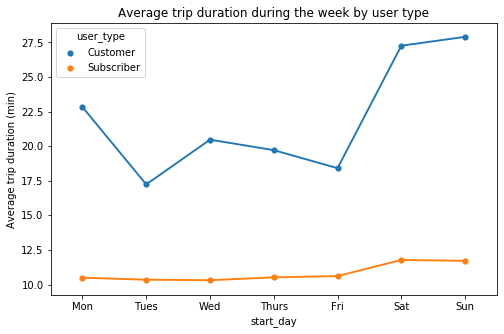

In [57]:
# Investigating the average trip duration during the week by user type
df_weekday_avg_duration = bike_data_copy.groupby(['start_day', 'user_type'])['duration_min'].mean().reset_index()
plt.figure(figsize=[8, 5])
sb.pointplot(data=df_weekday_avg_duration, x='start_day', y='duration_min' , hue = 'user_type', scale=.7);
#sb.barplot(data=df_weekday_avg_duration, x='start_day', y='duration_min' , hue = 'user_type');
ticks =  [0,1,2,3,4,5,6]
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks,labels)
plt.title('Average trip duration during the week by user type')
plt.ylabel('Average trip duration (min)')
plt.show()

> Previous investigation we found that average trip duration of customers are greater than subscribers. In the above graph it is clear that both user types average trip duration has increased during the weekend. 

**Average trip duration of subscribers by member gender and age group**

In [58]:
df_usertype_Av_duration = bike_data_copy.groupby(['age_group', 'member_gender','user_type'])['duration_min'].mean().reset_index()

In [59]:
df_subscriber_Av_duration = df_usertype_Av_duration.query('user_type == "Subscriber"')
df_customer_Av_duration = df_usertype_Av_duration.query('user_type == "Customer"')

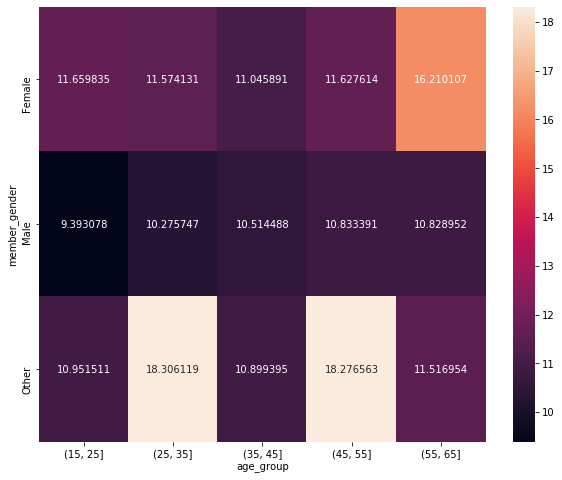

In [60]:
df_subscriber_Av_duration = df_subscriber_Av_duration.pivot(index = 'member_gender', columns = 'age_group', values = 'duration_min')
df_subscriber_Av_duration = df_subscriber_Av_duration.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_Av_duration, annot = True, fmt='f');

> Other gender users from age group (25-35), and (45,55) has longest average trip duration(18 mins). Females from the age group (55-65) had long average trip duration(16 mins). when we consider all age groups males average trip duration is around 10 mins. 

**Average trip duration of customers by member gender and age group**

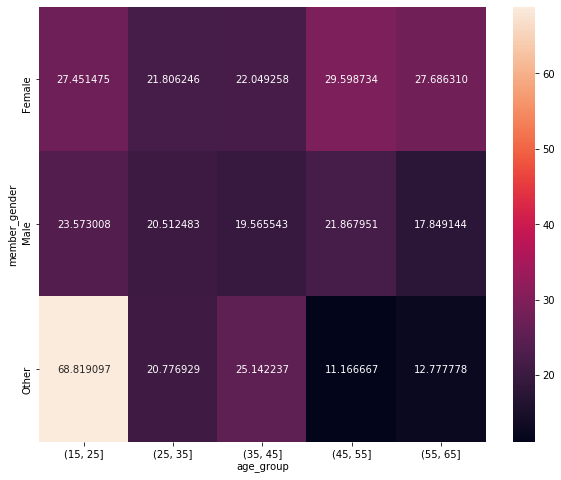

In [61]:
df_customer_Av_duration = df_customer_Av_duration.pivot(index = 'member_gender', columns = 'age_group', values = 'duration_min')
df_customer_Av_duration = df_customer_Av_duration.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_Av_duration, annot = True, fmt='f');

> Other gender users from age group (15-25) has longest average trip duration(68 mins). Females from the age groups (15-25), (45-55), and (55-65) had long average trip duration(28 mins). when we consider all age groups males average trip duration is around 20 mins.

In [79]:
df_userhour_station_id = bike_data_copy.groupby(['start_hour', 'start_station_id','user_type']).size().reset_index()

In [80]:
df_userhour_station_id = df_userhour_station_id.query('start_station_id == "58" | start_station_id == "67" | start_station_id == "81" | start_station_id == "21" | start_station_id == "3"')

In [81]:
df_subscriber_userhour_station = df_userhour_station_id.query('user_type == "Subscriber"')
df_customer_userhour_station = df_userhour_station_id.query('user_type == "Customer"')

**Subscribers mostly used station name and time**

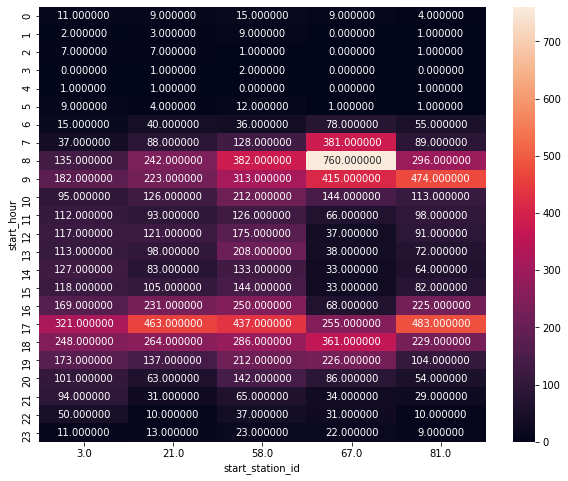

In [82]:
df_subscriber_userhour_station = df_subscriber_userhour_station.pivot(index = 'start_hour', columns = 'start_station_id', values = 0)
df_subscriber_userhour_station = df_subscriber_userhour_station.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_userhour_station, annot = True, fmt='f');

> Most of the trips have started from the station id 67 at 8 am. The station 67 is very busy from 7am - 9am. Likewise, station ids 58 and 81 are busy between 8-9am. In the afternoon station ids 21, 58 and 81 are very busy at 5pm.

**Customers mostly used station name and time**

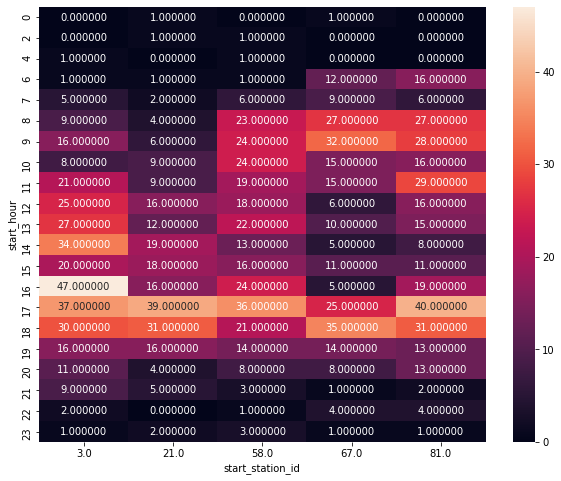

In [83]:
df_customer_userhour_station = df_customer_userhour_station.pivot(index = 'start_hour', columns = 'start_station_id', values = 0)
df_customer_userhour_station = df_customer_userhour_station.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_userhour_station, annot = True, fmt='f');

Mostly used station id by customers is 3 and it was busy around 4pm. In the afternoon all five stations (3, 21, 58, 67 and 81) are busy. But in the morning only three stations are busy, those station ids are 58, 67, 81. During the daytime station ids 3 and 58 are very busy.

**Subscribers usage of bike sharing system on each hour during the week.**

In [84]:
# create a dataframe of male subscribers in the 15-25 age group 
df_subscriber1_male = bike_data_copy.query('age_group == (15,25) & user_type == "Subscriber" & member_gender == "Male"')
df_subscriber_age25_male = df_subscriber1_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [85]:
# create a dataframe of female subscribers in the 15-25 age group
df_subscriber1_female = bike_data_copy.query('age_group == (15,25) & user_type == "Subscriber" & member_gender == "Female"')
df_subscriber_age25_female = df_subscriber1_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [86]:
# create a dataframe of male subscribers in the 25-35 age group
df_subscriber2_male = bike_data_copy.query('age_group == (25,35) & user_type == "Subscriber" & member_gender == "Male"')
df_subscriber_age35_male = df_subscriber2_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [87]:
# create a dataframe of female subscribers in the 25-35 age group
df_subscriber2_female = bike_data_copy.query('age_group == (25,35) & user_type == "Subscriber" & member_gender == "Female"')
df_subscriber_age35_female = df_subscriber2_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [88]:
# create a dataframe of male subscribers in the 35-45 age group
df_subscriber3_male = bike_data_copy.query('age_group == (35,45) & user_type == "Subscriber" & member_gender == "Male"')
df_subscriber_age45_male = df_subscriber3_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [89]:
# create a dataframe of female subscribers in the 35-45 age group
df_subscriber3_female = bike_data_copy.query('age_group == (35,45) & user_type == "Subscriber" & member_gender == "Female"')
df_subscriber_age45_female = df_subscriber3_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [90]:
# create a dataframe of male subscribers in the 45-55 age group
df_subscriber4_male = bike_data_copy.query('age_group == (45,55) & user_type == "Subscriber" & member_gender == "Male"')
df_subscriber_age55_male = df_subscriber4_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [91]:
# create a dataframe of female subscribers in the 45-55 age group
df_subscriber4_female = bike_data_copy.query('age_group == (45,55) & user_type == "Subscriber" & member_gender == "Female"')
df_subscriber_age55_female = df_subscriber4_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [92]:
# create a dataframe of male subscribers in the 55-65 age group
df_subscriber5_male = bike_data_copy.query('age_group == (55,65) & user_type == "Subscriber" & member_gender == "Male"')
df_subscriber_age65_male = df_subscriber5_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

In [93]:
# create a dataframe of female subscribers in the 55-65 age group
df_subscriber5_female = bike_data_copy.query('age_group == (55,65) & user_type == "Subscriber" & member_gender == "Female"')
df_subscriber_age65_female = df_subscriber5_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

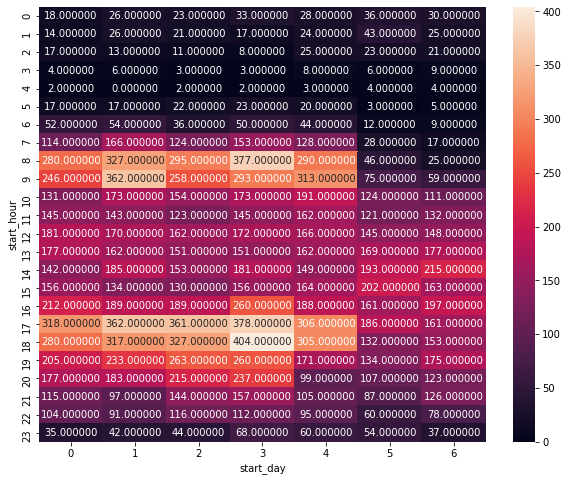

In [94]:
# The bike usage pattern of 25-35 aged male subscribers in each hour during the week
df_subscriber_age25_male = df_subscriber_age25_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age25_male = df_subscriber_age25_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age25_male, annot = True, fmt='f');

The highest bike usage happens on Thursday around 8 am and 6 pm. In the mornings 8-9 am period is busy on weekdays. In the afternoons 4-8 pm period is busy from Mon-Thurs day. But on Fridays in the afternoon bike usage is high 4-6 pm. This implies on Fridays people are going home early than on other weekdays. Weekends bike usage is high during the daytime.

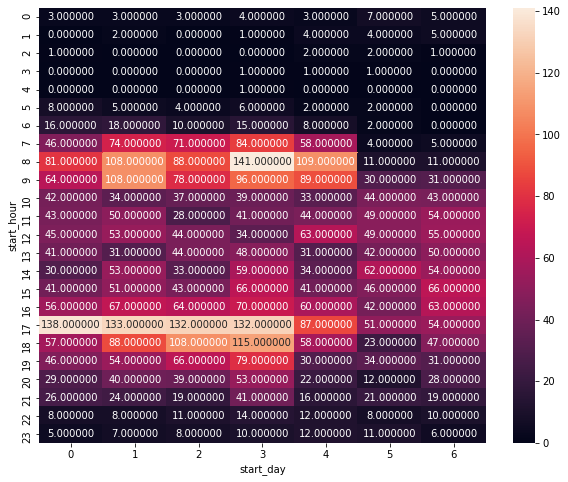

In [95]:
# The bike usage pattern of 15-25 aged female subscribers in each hour during the week
df_subscriber_age25_female = df_subscriber_age25_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age25_female = df_subscriber_age25_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age25_female, annot = True, fmt='f');

The highest bike usage has happened on Thursday at 8 am. Bike usage has peaked from Mon - Thurs day at 5 pm. When compared to other days Friday afternoon bike usage is low.

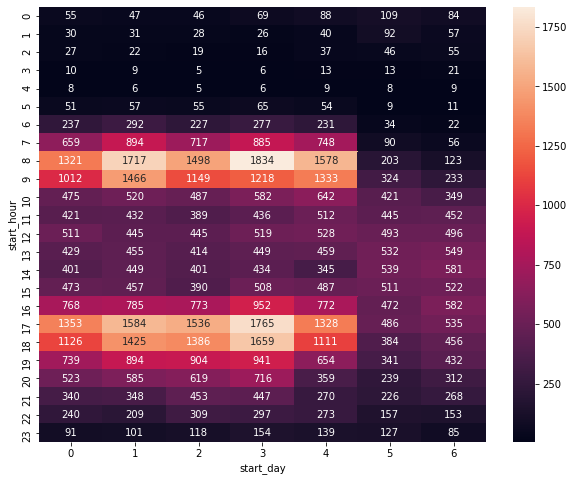

In [96]:
# The bike usage pattern of 25-35 aged male subscribers in each hour during the week
df_subscriber_age35_male = df_subscriber_age35_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age35_male, annot = True, fmt='d');

The numbers in the above chart imply that 25-35 aged males do not use the bike share system frequently. On weekdays people use the bike share system from 7 - 9 am and 4 - 9 pm. Bike usage on Thursdays is high. On Friday afternoon bike usage has decreased after 6 pm drastically.

In [99]:
# The bike usage pattern of 25-35 aged female subscribers in each hour during the week
df_subscriber_age35_female = df_subscriber_age35_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age35_female = df_subscriber_age35_female.replace(np.nan, 0)

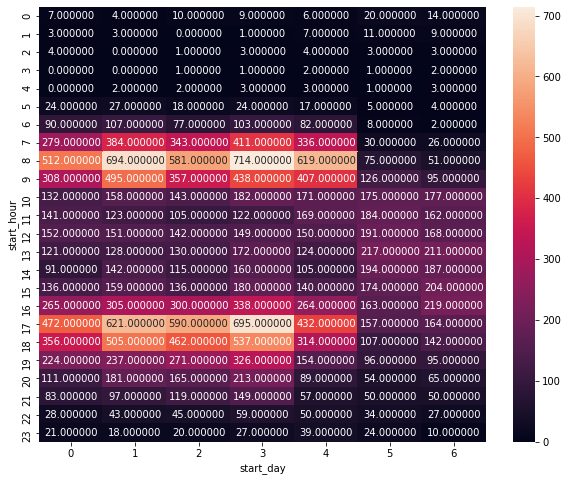

In [100]:
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age35_female, annot = True, fmt='f');

25-35 aged female subscribers have using the bike share system more than the same aged male group. 25-35 aged females also seem to use the bike share system for the commute. Busy hours for this age group also 7 - 9 am and 4 - 7 pm during weekdays. On Friday afternoon busy period is from 4 - 6 pm. Seems like on Fridays these people come back home early when compare to other weekdays. During weekends bike usage is high from 10 am to 6 pm.

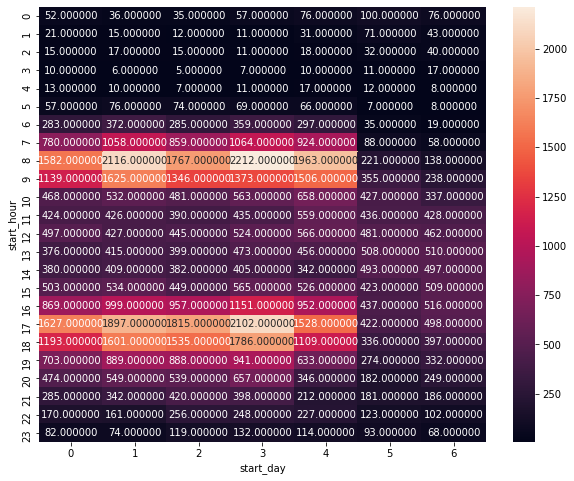

In [101]:
# The bike usage pattern of 35-45 aged male subscribers in each hour during the week
df_subscriber_age45_male = df_subscriber_age45_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age45_male = df_subscriber_age45_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age45_male, annot = True, fmt='f');

35-45 aged males also use bike-sharing systems mostly at 7-9 am and 4-6 pm. All other hours during the day have low bike usage.

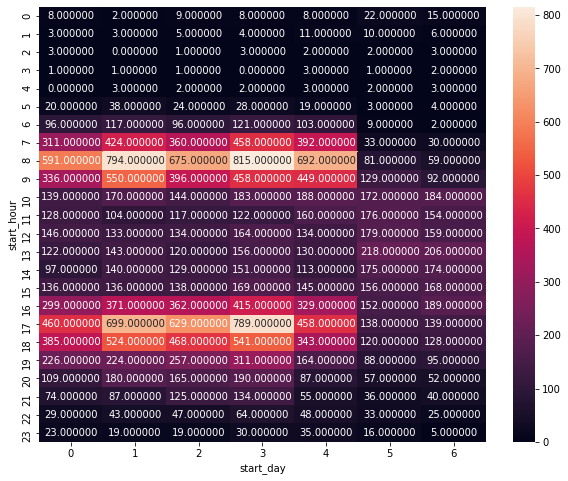

In [102]:
# The bike usage pattern of 35-45 aged female subscribers in each hour during the week
df_subscriber_age45_female = df_subscriber_age45_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age45_female = df_subscriber_age45_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age45_female, annot = True, fmt='f');

35 -45 aged subscribed females also use the bike share system for commute purposes. This proves from the high demand in 7-9 am and 4-7 pm periods. On Thursdays, there is a high demand in the mornings and afternoons. 

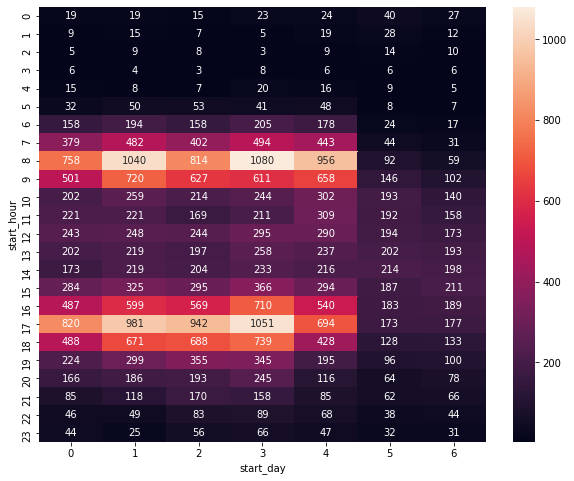

In [103]:
# The bike usage pattern of 45-55 aged male subscribers in each hour during the week
df_subscriber_age55_male = df_subscriber_age55_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age55_male = df_subscriber_age55_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age55_male, annot = True, fmt='d');

45 - 55 aged subscribed males do not use bike share system more frequently when compared to other subscribers. Maybe at this age males have their own vehicles and they use their own vehicles for their transportation.
When considering the busy hours of the above graph we can conclude that these people also use bike sharing for commute purposes.

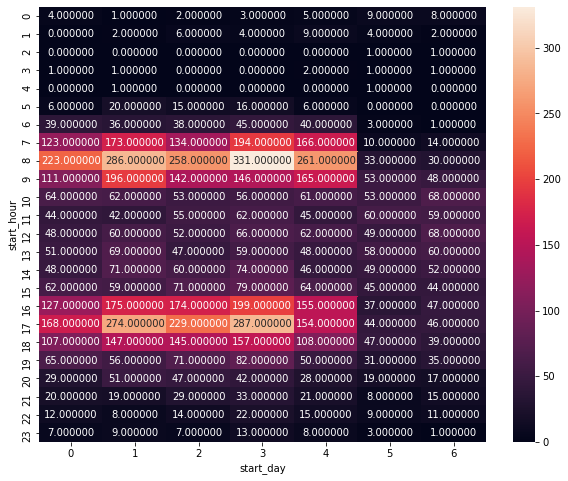

In [104]:
# The bike usage pattern of 45-55 aged female subscribers in each hour during the week
df_subscriber_age55_female = df_subscriber_age55_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age55_female = df_subscriber_age55_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age55_female, annot = True, fmt='f');

The above graph implies that 45-55 aged females also use the bike share system for commute purposes. 

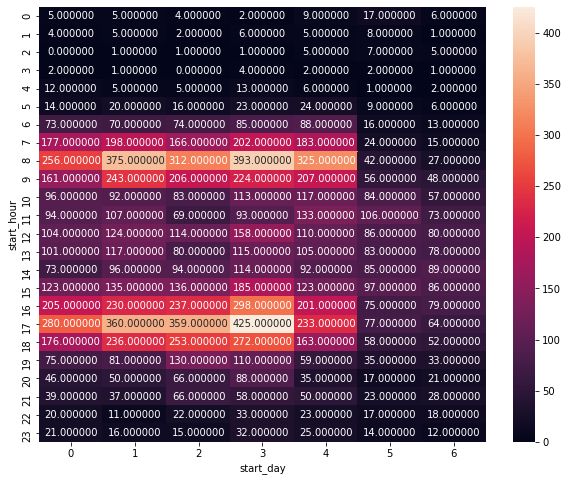

In [105]:
# The bike usage pattern of 55-65 aged male subscribers in each hour during the week
df_subscriber_age65_male = df_subscriber_age65_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age65_male = df_subscriber_age65_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age65_male, annot = True, fmt='f');

It seems 55-65 aged males also use the bike sharing system for commute purposes.  

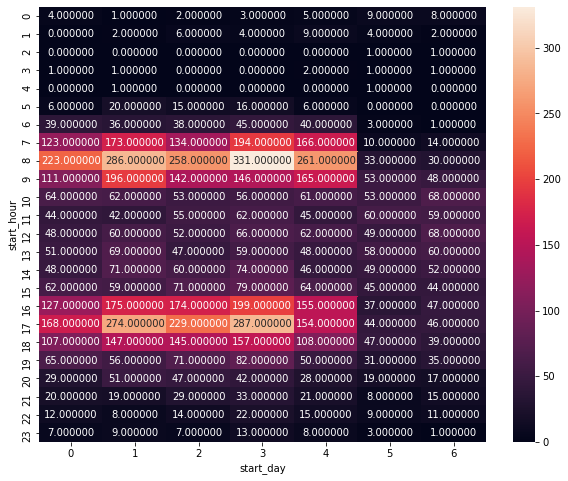

In [106]:
# The bike usage pattern of 55-65 aged female subscribers in each hour during the week
df_subscriber_age65_female = df_subscriber_age65_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_subscriber_age65_female = df_subscriber_age65_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_subscriber_age55_female, annot = True, fmt='f');

It seems 55-65 aged females also use the bike sharing system for commute purposes.

By analyzing the subscribers' bike-sharing system usage on each hour during the week we can conclude that,  
1) Mon - Thurs days' busy hours are, 7-9 am and 4-8 pm.  
2) Friday busy hours, 7-9 am and 4-6 pm.  
by analyzing busy hours on weekdays we can conclude that subscribers use the bike-sharing system for commute purposes. On Fridays, it seems people go home early as Friday busy time end at 6 pm.  
3) During the daytime bike usage is low when compared to busy hours.  
4) Weekends bike usage is high from 10 am to 6 pm. But subscribers' weekend bike usage is less than weekdays busy hours usage.   
5) We cannot find any considerable difference between male and female bike usage patterns of subscribers.  

**Customers usage of bike sharing system on each hour during the week.**

In [107]:
bike_data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,start_day,start_hour,duration_min,user_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,2019-02-28 00:00:00.000,3,17,869.750000,35,"(25, 35]"
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,2019-02-28 00:00:00.000,3,12,1030.900000,47,"(45, 55]"
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,2019-02-28 00:00:00.000,3,17,608.166667,30,"(25, 35]"
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,2019-02-28 00:00:00.000,3,23,26.416667,45,"(35, 45]"
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,2019-02-28 00:00:00.000,3,23,29.883333,60,"(55, 65]"


In [108]:
# create a dataframe of male customers in the 15-25 age group
df_customer1_male = bike_data_copy.query('age_group == (15,25) & user_type == "Customer" & member_gender == "Male"')
df_customer1_age25_male = df_customer1_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

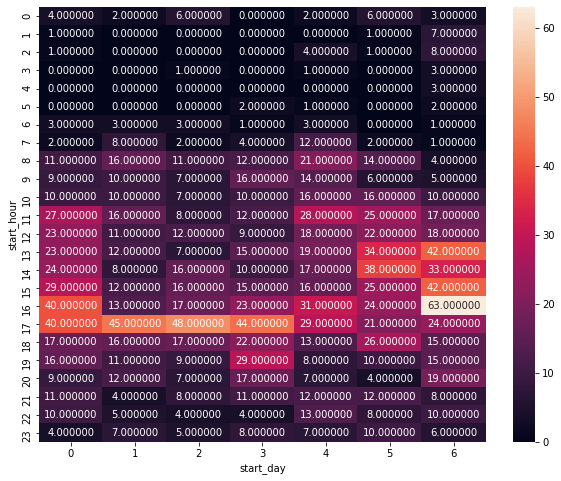

In [109]:
# The bike usage pattern of 15-25 aged male customers in each hour during the week
df_customer1_age25_male = df_customer1_age25_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer1_age25_male = df_customer1_age25_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer1_age25_male, annot = True, fmt='f');

The highest bike usage is reported on Sunday around 4 pm. 15-25 aged male customers are using the bike sharing system heavily during weekend and monday daytime. Weekdays around 5 pm bike usage is high.

In [110]:
# create a dataframe of female customers in the 15-25 age group
df_customer1_female = bike_data_copy.query('age_group == (15,25) & user_type == "Customer" & member_gender == "Female"')
df_customer_age25_female = df_customer1_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

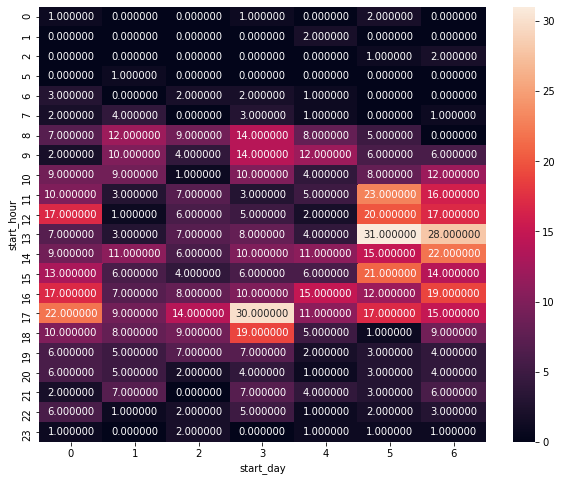

In [111]:
# The bike usage pattern of 15-25 aged female customers in each hour during the week
df_customer_age25_female = df_customer_age25_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age25_female = df_customer_age25_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age25_female, annot = True, fmt='f');

15-25 aged female customers are using the bike-shaing system more than the male customers during the weekend. They use the bike sharing system heavily from 11 am - 5 pm. During weekdays bike usage is very low except Monday.

In [112]:
# create a dataframe of male customers in the 25-35 age group
df_customer2_male = bike_data_copy.query('age_group == (25,35) & user_type == "Customer" & member_gender == "Male"')
df_customer_age35_male = df_customer2_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

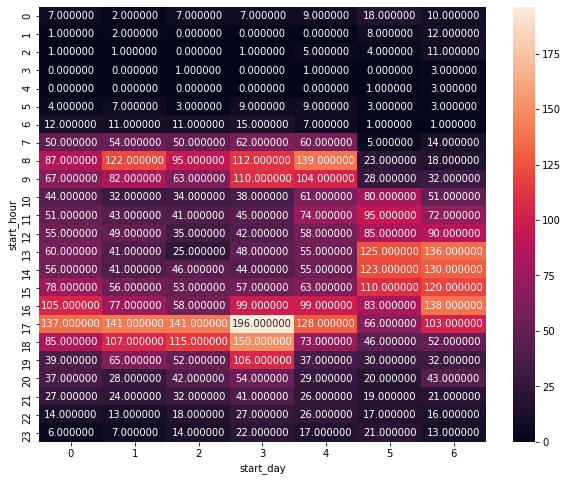

In [113]:
# The bike usage pattern of 25-35 aged male customers in each hour during the week
df_customer_age35_male = df_customer_age35_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age35_male = df_customer_age35_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age35_male, annot = True, fmt='f');

25-35 aged male customers use the bike-sharing system on weekends from 10 am to 5 pm. And also they use the system at 8-9 am and in the afternoon from 4-6 pm. It seems 25-35 aged males are using the bike-sharing system for commute purposes on weekdays. On weekends they use bikes for their work during the daytime. Highest usage is reported on Thursdays at 5 pm.

In [114]:
# create a dataframe of female customers in the 25-35 age group
df_customer2_female = bike_data_copy.query('age_group == (25,35) & user_type == "Customer" & member_gender == "Female"')
df_customer_age35_female = df_customer2_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

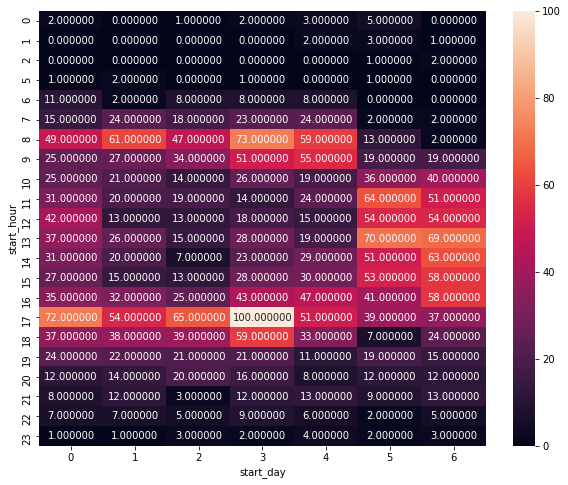

In [115]:
# The bike usage pattern of 25-35 aged female customers in each hour during the week
df_customer_age35_female = df_customer_age35_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age35_female = df_customer_age35_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age35_female, annot = True, fmt='f');

25-35 aged female customers use the bike-sharing system heavily on weekends(10 am - 5 pm). Also, it seems they use bikes for commute purposes. Because they heavily use bikes all weekdays around 8 am and 5 pm.

In [116]:
# create a dataframe of male customers in the 35-45 age group
df_customer3_male = bike_data_copy.query('age_group == (35,45) & user_type == "Customer" & member_gender == "Male"')
df_customer_age45_male = df_customer3_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

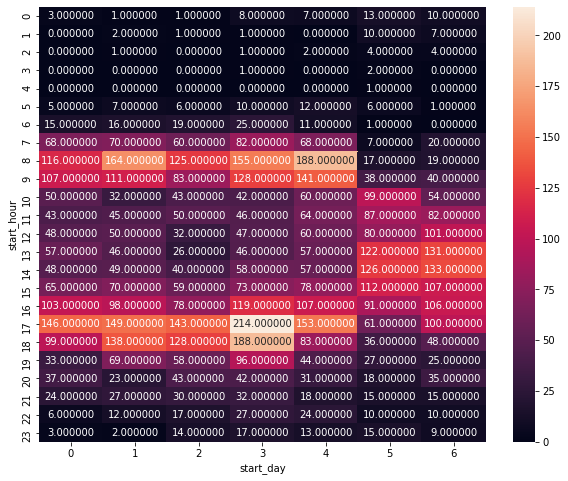

In [117]:
# The bike usage pattern of 35-45 aged male customers in each hour during the week
df_customer_age45_male = df_customer_age45_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age45_male = df_customer_age45_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age45_male, annot = True, fmt='f');

35-45 aged male customers also use the bike-sharing system for commute purposes on weekdays (8-9 am & 4-6 pm) and during daytime(10 am - 5 pm) on weekends. 

In [118]:
# create a dataframe of female customers in the 35-45 age group
df_customer3_female = bike_data_copy.query('age_group == (35,45) & user_type == "Customer" & member_gender == "Female"')
df_customer_age45_female = df_customer3_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

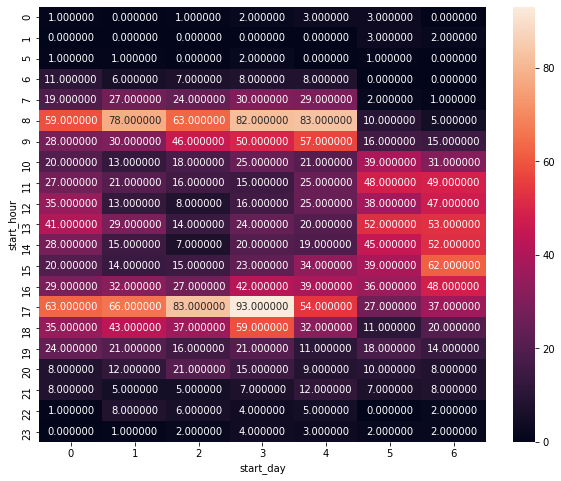

In [119]:
# The bike usage pattern of 35-45 aged female customers in each hour during the week
df_customer_age45_female = df_customer_age45_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age45_female = df_customer_age45_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age45_female, annot = True, fmt='f');

35-45 aged female customers also use the bike-sharing system for commute purposes on weekdays (8-9 am & 4-6 pm) and during daytime(10 am - 5 pm) on weekends. 

In [120]:
# create a dataframe of male customers in the 45-55 age group
df_customer4_male = bike_data_copy.query('age_group == (45,55) & user_type == "Customer" & member_gender == "Male"')
df_customer_age55_male = df_customer4_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

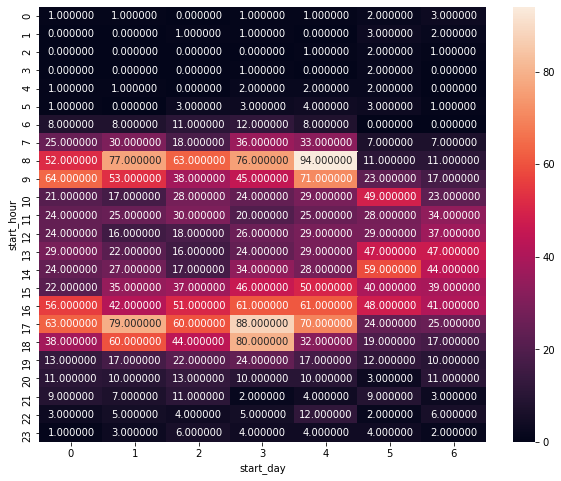

In [121]:
# The bike usage pattern of 45-55 aged male customers in each hour during the week
df_customer_age55_male = df_customer_age55_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age55_male = df_customer_age55_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age55_male, annot = True, fmt='f');

45-55 aged male customers also use the bike-sharing system for commute purposes on weekdays (8-9 am & 4-6 pm) and during daytime(10 am - 4 pm) on weekends.

In [122]:
# create a dataframe of female customers in the 45-55 age group
df_customer4_female = bike_data_copy.query('age_group == (45,55) & user_type == "Customer" & member_gender == "Female"')
df_customer_age55_female = df_customer4_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

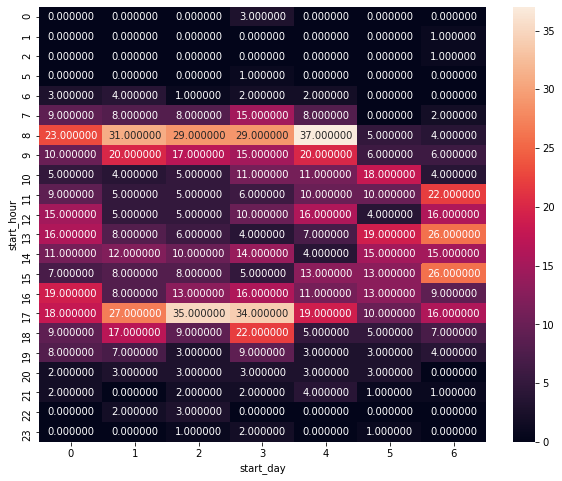

In [123]:
# The bike usage pattern of 45-55 aged female customers in each hour during the week
df_customer_age55_female = df_customer_age55_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age55_female = df_customer_age55_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age55_female, annot = True, fmt='f');

45-55 aged female customers also use the bike-sharing system for commute on weekdays. Also, they use bike-sharing system during weekend daytime.

In [124]:
# create a dataframe of male customers in the 55-65 age group
df_customer5_male = bike_data_copy.query('age_group == (55,65) & user_type == "Customer" & member_gender == "Male"')
df_customer_age65_male = df_customer5_male.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

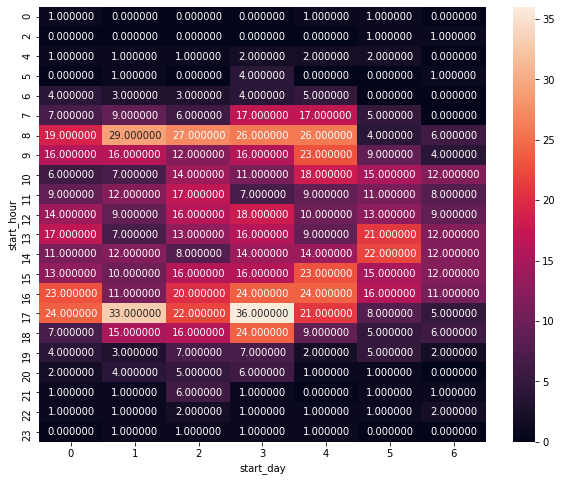

In [125]:
# The bike usage pattern of 55-65 aged male customers in each hour during the week
df_customer_age65_male = df_customer_age65_male.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age65_male = df_customer_age65_male.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age65_male, annot = True, fmt='f');

55-65 aged male customers use bike-sharing system during daytime both on weekdays and weekends.

In [126]:
# create a dataframe of female customers in the 55-65 age group
df_customer5_female = bike_data_copy.query('age_group == (55,65) & user_type == "Customer" & member_gender == "Female"')
df_customer_age65_female = df_customer5_female.groupby(['start_day', 'start_hour']).agg({'bike_id' : 'count'}).reset_index()

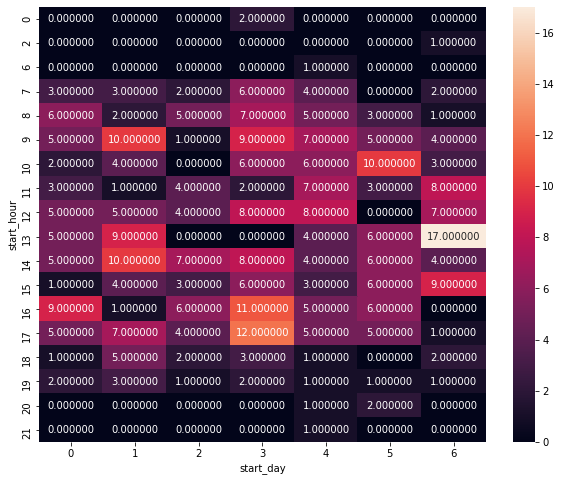

In [127]:
# The bike usage pattern of 55-65 aged female customers in each hour during the week
df_customer_age65_female = df_customer_age65_female.pivot(index = 'start_hour', columns = 'start_day', values = 'bike_id')
df_customer_age65_female = df_customer_age65_female.replace(np.nan, 0)
plt.figure(figsize=(10,8))
sb.heatmap(df_customer_age65_female, annot = True, fmt='f');

55-65 aged female customers' bike sharing system usage is very low when compared to same aged male customers. They are using the bike-sharing system during the daytime both on weekdays and weekends.

By analyzing the customers' bike-sharing system usage on each hour during the week we can conclude that,    
1) 15-25 aged customers,   
15-25 aged customers use the bike-sharing system mostly on weekends. Female customers use bikes more than male customers.  
2) 25-55 aged customers,  
25-55 aged customers use the bike-sharing system for commute purposes. Busy hours on weekdays are 8-9 am and 4-6 pm. They use bikes during the daytime (10 am-5 pm) on weekends.  
3) 55-65 aged customers,  
55-65 aged customers use the bike-sharing system daytime on both weekdays and weekends. female usage is very low when compared to same aged males.  

### `

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Findings in the Multivariate Exploration section are summarized according to the features of interest as below,

>1.	Times (when and where) that bikes are high in demand.   
Subscribers mostly used station ids and busy times are,    
        Station id 67 (7-9 am)  
        Station id 58 (8-9 am & 5 pm)  
        Station id 81 (8-9 am & 5 pm)  
        Station id 21 (5 pm)  
Customers mostly used station ids and busy times are,  
        Station id 3 (whole day)  
        Station id 58 (morning & day time)  
        Station id 67 (morning & afternoon)  
        Station id 81 (morning & afternoon)  
        Station id 21 (afternoon)  

>2.	Type of users that use the bike system most and their characteristics like age, gender, and which day and time they use it most.  
Subscribers,  
By analyzing the bike-sharing usage of subscribers on each hour during the week by their age and gender we can conclude that,
They mostly use bike-sharing for commute purposes. Weekday’s busy hours are 7-9 am and 4-8 pm. Friday afternoon busy hour ends at 6 pm and it implies on Fridays they finish their work early. Weekdays during the daytime bike usage and Weekends daytime (10-6 pm) bike usage is low when compared to weekday busy hours. There is no considerable difference between male and female bike usage patterns of subscribers.    
Customers,  
By analyzing the bike-sharing usage of customers on each hour during the week by their age and gender we can conclude that,
15-25 aged customers use the bike-sharing system mostly on weekends. In this age group, female customers use bikes more than male customers.  
25-55 aged customers use the bike-sharing system for commute purposes. Busy hours on weekdays are 8-9 am and 4-6 pm. They use bikes during the daytime (10 am-5 pm) on weekends.  
55-65 aged customers use the bike-sharing system during the daytime on both weekdays and weekends. Female usage is very low when compared to same-aged males.  

>3. Factors impacting the trip duration and in which situations the users have used longer trips.  
Subscribers average trip duration,  
Other gender users from age groups (25-35), and (45,55) have the longest average trip duration. That is 18 mins. 
Females from the age group (55-65) had a long average trip duration. That is 16mins.
When we consider all age groups males' average trip duration is around 10 mins.
Customers average trip duration,  
Other gender users from the age group (15-25) have the longest average trip duration(68 mins).
Females from the age groups (15-25), (45-55), and (55-65) had a long average trip duration(28 mins). 
When we consider all age groups males' average trip duration is around 20 mins. 




### Were there any interesting or surprising interactions between features?

> Users who use the bike share system most use it for shorter trips and on the other hand, users who had longer trips didn’t use the system much frequently. Most of the subscribers(every gender and all age groups) use this system for commute purposes. Customers' behavior is different than subscribers' behavior. Middle-aged customers use bike-sharing for commute purposes. On the other hand, young and old customers use it during day time during the whole week. Another interesting fact is young female customers use bike sharing more than same-aged male customers. On the other hand, old female customers' usage of bike-sharing systems is very low.  